In [1]:
import pandas as pd
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('baselined.csv')

In [3]:
# Trim
start_col_list = []
end_col_list = []
base_dir = '../Dataset/Sub-Serovar/'
for file_name in os.listdir(base_dir):
    if file_name .startswith('.DS_Store'):
        continue
    df_s = pd.read_csv(base_dir+'/'+file_name)
    start_col_list.append(round(float(df_s.columns[0]),1))
    end_col_list.append(round(float(df_s.columns[-1]),1))

In [4]:
trim_start = max(start_col_list)
trim_end = min(end_col_list)
search_index_list = [round(float(x),1) for x in df.drop(columns=['Serovar']).columns]
print(len(search_index_list))
trim_start_index = list(search_index_list).index(trim_start)
trim_end_index = list(search_index_list).index(trim_end)
print(trim_start, trim_end)
print(trim_start_index, trim_end_index)

144004
2005.0 19953.9
71 143834


In [5]:
serovar = list(df.Serovar)
df = df.iloc[:,trim_start_index:trim_end_index+1]

In [6]:
df.columns

Index(['2005.0', '2005.1', '2005.2', '2005.3', '2005.4', '2005.5', '2005.6',
       '2005.7', '2005.8', '2005.9',
       ...
       '19952.2', '19952.5', '19952.6', '19952.7', '19952.8', '19953.2',
       '19953.3', '19953.4', '19953.5', '19953.9'],
      dtype='object', length=143764)

In [7]:
df.eq(0).any().any()

True

In [8]:
df.replace({0:np.nan},inplace=True)

In [9]:
df.eq(0).any().any()

False

In [10]:
df.head()

,2005.0,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,...,19952.2,19952.5,19952.6,19952.7,19952.8,19953.2,19953.3,19953.4,19953.5,19953.9
0,504.385762,NaN,NaN,434.377882,NaN,441.370004,NaN,508.362128,NaN,641.354253,...,NaN,NaN,NaN,272.546887,NaN,NaN,275.596110,NaN,NaN,NaN
1,225.505562,NaN,NaN,247.501924,NaN,319.498287,NaN,419.494651,NaN,404.491016,...,NaN,NaN,NaN,189.163285,NaN,NaN,195.196104,NaN,NaN,NaN
2,473.051112,NaN,NaN,546.024579,NaN,567.998047,NaN,637.971517,NaN,562.944989,...,NaN,NaN,NaN,352.791600,NaN,NaN,345.846077,NaN,NaN,NaN
3,483.138173,NaN,NaN,449.138650,NaN,446.139126,NaN,509.139604,NaN,547.140082,...,NaN,NaN,NaN,142.284644,NaN,NaN,149.311086,NaN,NaN,NaN
4,537.710344,NaN,NaN,544.722157,NaN,441.733971,NaN,424.745785,NaN,445.757599,...,NaN,NaN,NaN,88.811417,NaN,NaN,89.829453,NaN,NaN,NaN


In [11]:
n_del = len(df.columns)%10
for i in range(n_del):
    if i%2 == 0:
        df = df.iloc[:,1:]
    else:
        df = df.iloc[:,:-1]

In [12]:
bin_size = 10
bin_data = []
for i, row in df.iterrows():
    vals = list(row.values)
    val_chunks = [vals[i:i + bin_size] for i in range(0, len(vals), bin_size)]
    #print(val_chunks)
    val_mean_chunk = [max([k if not np.isnan(k) else 0 for k in x]) for x in val_chunks]
    #print(val_mean_chunk)
    bin_data.append(val_mean_chunk)
cols = list(df.columns.astype(float))
col_chunks = [cols[i:i + bin_size] for i in range(0, len(cols), bin_size)]
col_mean_chunk = [np.round(np.average(x),1) for x in col_chunks]
binned_df = pd.DataFrame(bin_data,columns=col_mean_chunk)

In [13]:
df.head()

,2005.2,2005.3,2005.4,2005.5,2005.6,2005.7,2005.8,2005.9,2006.0,2006.1,...,19952.0,19952.1,19952.2,19952.5,19952.6,19952.7,19952.8,19953.2,19953.3,19953.4
0,NaN,434.377882,NaN,441.370004,NaN,508.362128,NaN,641.354253,NaN,665.346379,...,288.497666,NaN,NaN,NaN,NaN,272.546887,NaN,NaN,275.596110,NaN
1,NaN,247.501924,NaN,319.498287,NaN,419.494651,NaN,404.491016,NaN,418.487382,...,207.130467,NaN,NaN,NaN,NaN,189.163285,NaN,NaN,195.196104,NaN
2,NaN,546.024579,NaN,567.998047,NaN,637.971517,NaN,562.944989,NaN,497.918463,...,342.737125,NaN,NaN,NaN,NaN,352.791600,NaN,NaN,345.846077,NaN
3,NaN,449.138650,NaN,446.139126,NaN,509.139604,NaN,547.140082,NaN,505.140560,...,164.258204,NaN,NaN,NaN,NaN,142.284644,NaN,NaN,149.311086,NaN
4,NaN,544.722157,NaN,441.733971,NaN,424.745785,NaN,445.757599,NaN,506.769413,...,97.793382,NaN,NaN,NaN,NaN,88.811417,NaN,NaN,89.829453,NaN


<Axes: >

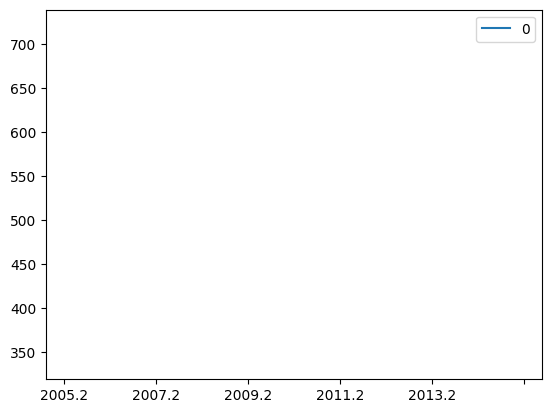

In [14]:
df.iloc[:1,:100].T.plot()

Text(0, 0.5, 'Intensity')

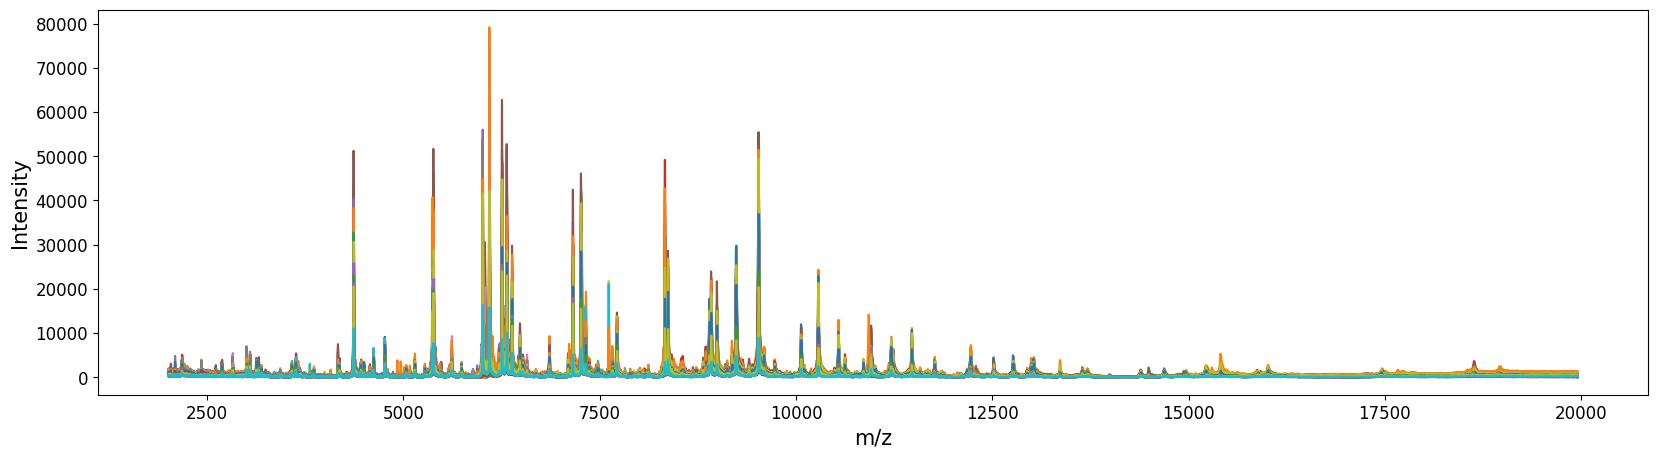

In [16]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
for i, s in binned_df.iterrows():
    ax.plot(s)
#ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

In [18]:
binned_df.shape

(200, 14376)

In [17]:
binned_df['Serovar'] = serovar
binned_df.to_csv('binned2.csv',index=False)

In [17]:
set(serovar)

{'Agona', 'Albany', 'Altona', 'Enteritidis', 'Typhimurium'}

<Axes: >

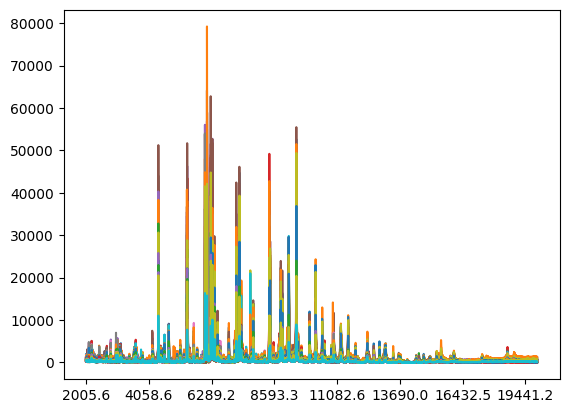

In [19]:
binned_df.drop(columns=['Serovar']).T.plot(legend=False)